In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D

In [3]:
import cv2
import os

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
train_dr="/content/drive/My Drive/Nural Network & Fuzzy System Project(Bird Species)/Data/train"
test_dr="/content/drive/My Drive/Nural Network & Fuzzy System Project(Bird Species)/Data/test"
val_dr="/content/drive/My Drive/Nural Network & Fuzzy System Project(Bird Species)/Data/valid"
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
epochs = 30
batch_size = 255
nb_train_samples = 31316
nb_validation_samples = 1125
nb_test_samples = 1125

In [6]:
#Helper function to load images from given directories
def load_images(directory,classes):
    images = []
    labels = []
    for idx, label in enumerate(classes):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [ ]:
classes = sorted(os.listdir(train_dr))
x_train, y_train = load_images(train_dr,classes)

if uniq_labels == sorted(os.listdir(test_dr)):
    x_test, y_test = load_images(test_dr,classes)
x_valid, y_valid = load_images(val_dr,classes)

In [ ]:
def print_img(image_list,classes):
  n=int(len(image_list)/len(classes))
  cols=5
  rows=6
  fig=plt.figure(figsize=(24,12))

  for i in range(len(classes)):
    if(i==30):
      break;
    ax=plt.subplot(rows,cols,i+1)
    plt.imshow(image_list[int(n*i)])
    plt.title(uniq_labels[i])
    ax.title.set_fontsize(20)
    ax.axis('off')
  plt.show()

Training  Image:


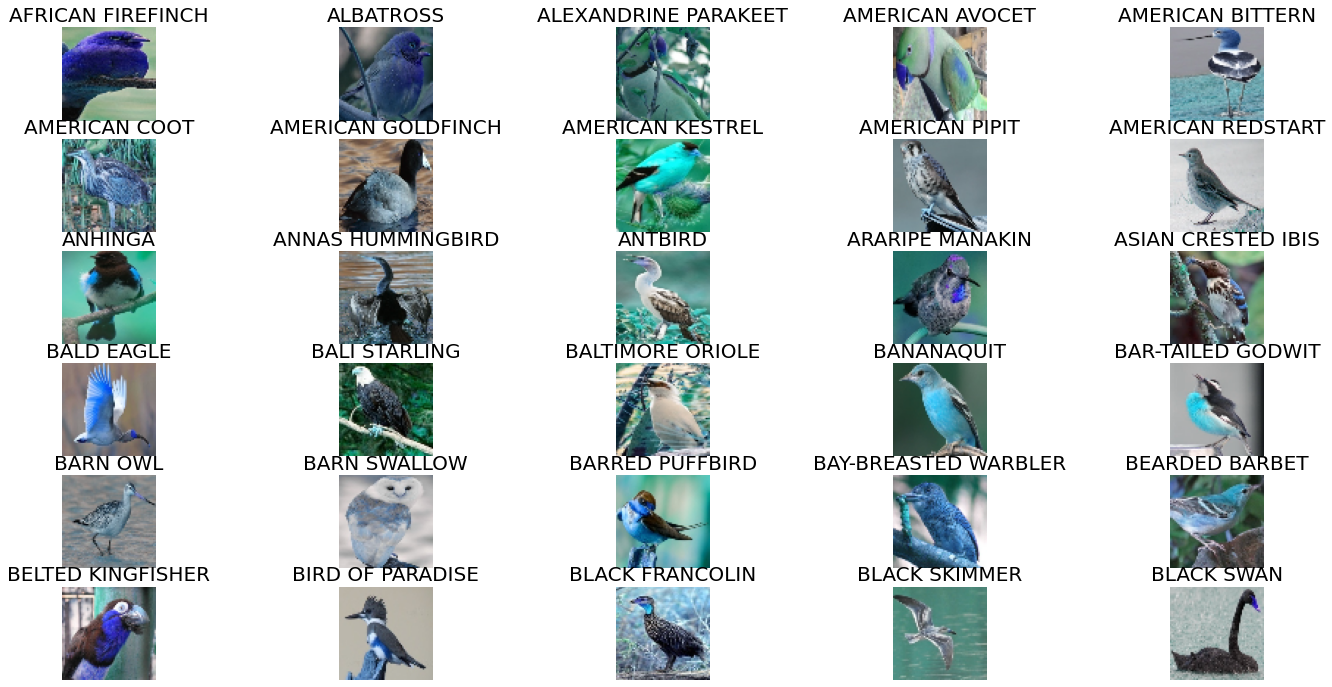

In [ ]:
print("Training  Image:")
print_img(x_train,classes)

In [ ]:
model = Sequential()


model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(225))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train_dr,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = datagen.flow_from_directory(
    val_dr,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_dr,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 31316 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.


In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/30
122/122 [==============================] - 1824s 15s/step - loss: 5.4073 - accuracy: 0.0071 - val_loss: 5.3403 - val_accuracy: 0.0176
Epoch 2/30
122/122 [==============================] - 1820s 15s/step - loss: 5.0508 - accuracy: 0.0317 - val_loss: 4.3969 - val_accuracy: 0.0833
Epoch 3/30
122/122 [==============================] - 1824s 15s/step - loss: 4.4061 - accuracy: 0.0934 - val_loss: 3.5746 - val_accuracy: 0.2206
Epoch 4/30
121/122 [============================>.] - ETA: 14s - loss: 3.8306 - accuracy: 0.1722

In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accurancy: %.2f%%" % (scores[1]*100))
scores = model.evaluate_generator(train_generator, nb_train_samples // batch_size)
print("Accurancy: %.2f%%" % (scores[1]*100))

Accurancy: 14.73%
Accurancy: 14.80%


In [ ]:
import tensorflow as tf
img = keras.preprocessing.image.load_img("/content/drive/My Drive/Nural Network & Fuzzy System Project(Bird Species)/Data/test/AFRICAN FIREFINCH/3.jpg", 
                                         target_size=(64, 64) )
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
label = (classes[np.argmax(score)])
print(label)

AFRICAN FIREFINCH
